# Importing libraries and data, cleaning and data Visualisation

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import tensorflow as tf
import nltk #Natural Language Toolkit
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Run all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import FunctionTransformer
import scipy.sparse

In [ ]:
!file spam.csv

spam.csv: CSV text


In [ ]:
#load data & print samples
df = pd.read_csv('spam.csv', encoding='latin-1')
data_head = df.head()
data_info = df.info()

data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


(     v1                                                 v2 Unnamed: 2  \
 0   ham  Go until jurong point, crazy.. Available only ...        NaN   
 1   ham                      Ok lar... Joking wif u oni...        NaN   
 2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
 3   ham  U dun say so early hor... U c already then say...        NaN   
 4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
 
   Unnamed: 3 Unnamed: 4  
 0        NaN        NaN  
 1        NaN        NaN  
 2        NaN        NaN  
 3        NaN        NaN  
 4        NaN        NaN  ,
 None)

The dataset consists of 5,572 entries and 5 columns.

Columns are named 'v1', 'v2', and there are three additional unnamed columns with the majority of missing values.


Column 'v1' contains the labels (ham or spam).


Column 'v2' contains the email text.


The three unnamed columns ('Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4') seem to be mostly empty and may not be relevant for our classification task.

In [ ]:
# Dropping the irrelevant columns
data_clean = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Renaming the columns for better readability
data_clean.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

# Converting all text to lowercase
data_clean['text'] = data_clean['text'].str.lower()

# Checking the first few rows to ensure changes took place
data_clean_head = data_clean.head()

data_clean_head


,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


The dataset has been cleaned up by performing the following steps:

Removed the irrelevant unnamed columns.

Renamed 'v1' to 'label' and 'v2' to 'text' for clarity.

Converted all text to lowercase for uniformity.

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='count', ylabel='label'>

Text(0.5, 1.0, 'Distribution of Spam and Ham Emails')

Text(0.5, 0, 'Email Type')

Text(0, 0.5, 'Frequency')

(<Figure size 600x400 with 1 Axes>,
 label
 ham     4825
 spam     747
 Name: count, dtype: int64)

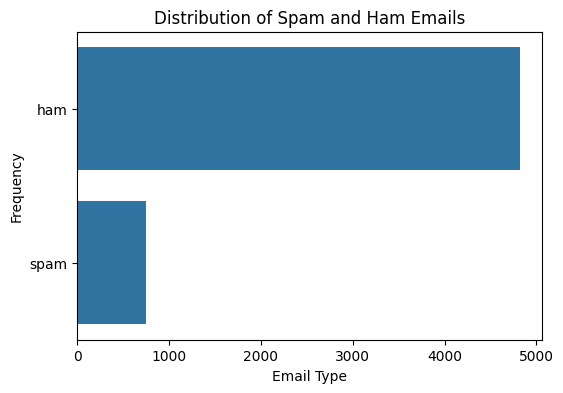

In [ ]:
# Visualizing the distribution of the classes
plt.figure(figsize=(6,4))
sns.countplot(data_clean['label'])
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Frequency')
class_distribution = plt.gcf()  # Get the current figure to display later

# Checking the balance of the dataset
label_counts = data_clean['label'].value_counts()

# Display the class distribution plot and the value counts
class_distribution, label_counts

There are significantly more 'ham' (legitimate) emails (4,825) than 'spam' emails (747) in the dataset.

This indicates a class imbalance, which is common in spam detection problems.

(-1.0999999930636881,
 1.0999998878863575,
 -1.0999998636606978,
 1.0999999867372312)

Text(0.5, 1.0, 'Spam - Ham Distribution')

Text(4875, 0.0, '4825')

Text(797, 1.0, '747')

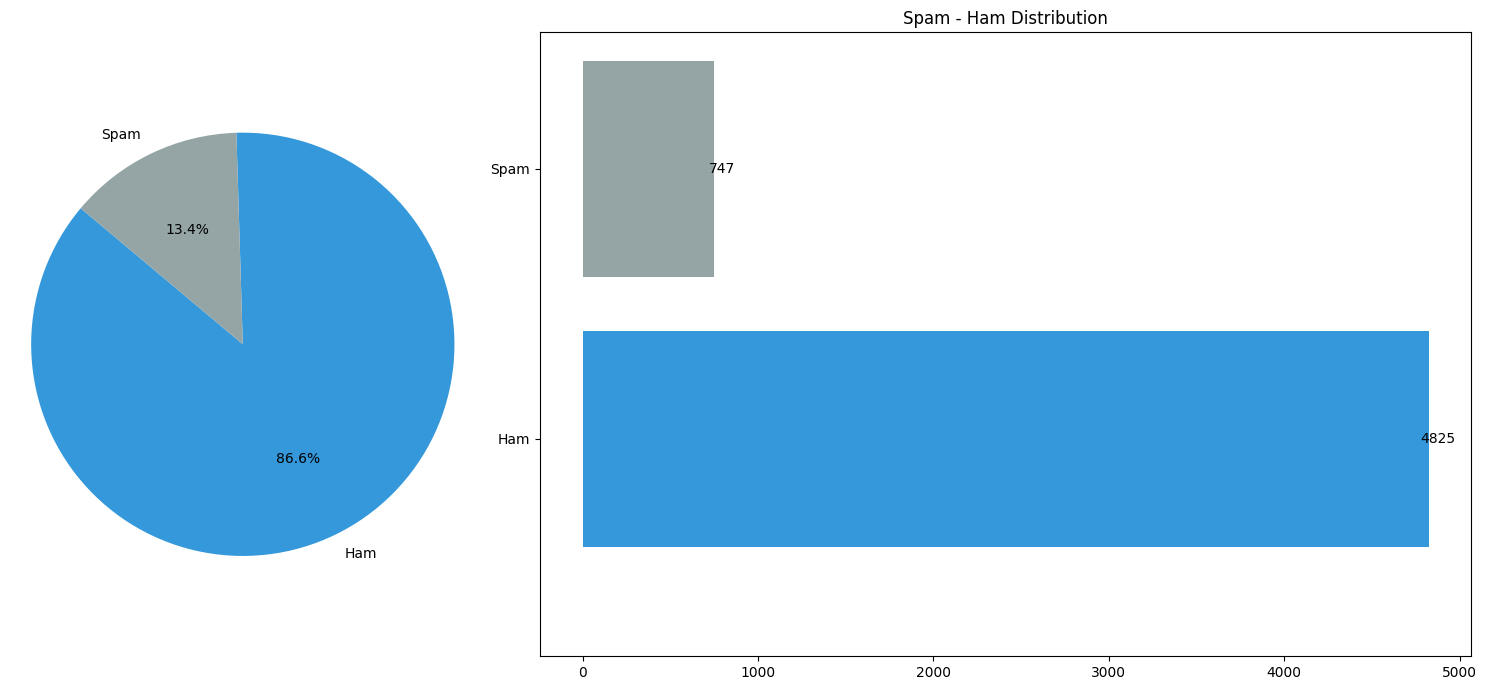

In [ ]:
# Let's first calculate the sizes for the pie (donut) chart.
sizes = data_clean['label'].value_counts()
# Define the labels and the corresponding colors for the charts.
labels = ['Ham', 'Spam']
colors = ['#3498db', '#95a5a6']

# Now let's create the plots.
fig, axs = plt.subplots(1, 2, figsize=(15, 7), gridspec_kw={'width_ratios': [1, 2]})

# Pie chart
donut = axs[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# Draw a circle at the center to turn the pie into a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Horizontal bar chart
bars = axs[1].barh(labels, sizes, color=colors)
axs[1].set_title('Spam - Ham Distribution')
# Adding the text labels on the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 50  # change to adjust the space from the end of the bar to the label
    axs[1].text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', ha='center', va='center')

plt.tight_layout()
plt.show()







## Word Cloud

(<Figure size 800x800 with 1 Axes>, <Figure size 800x800 with 1 Axes>)

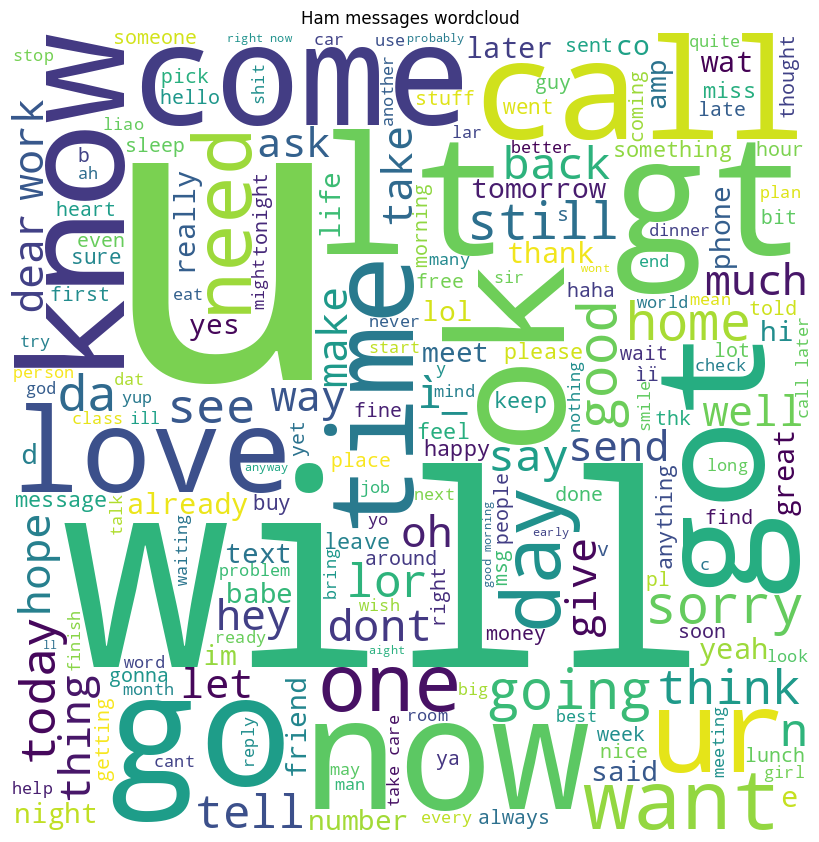

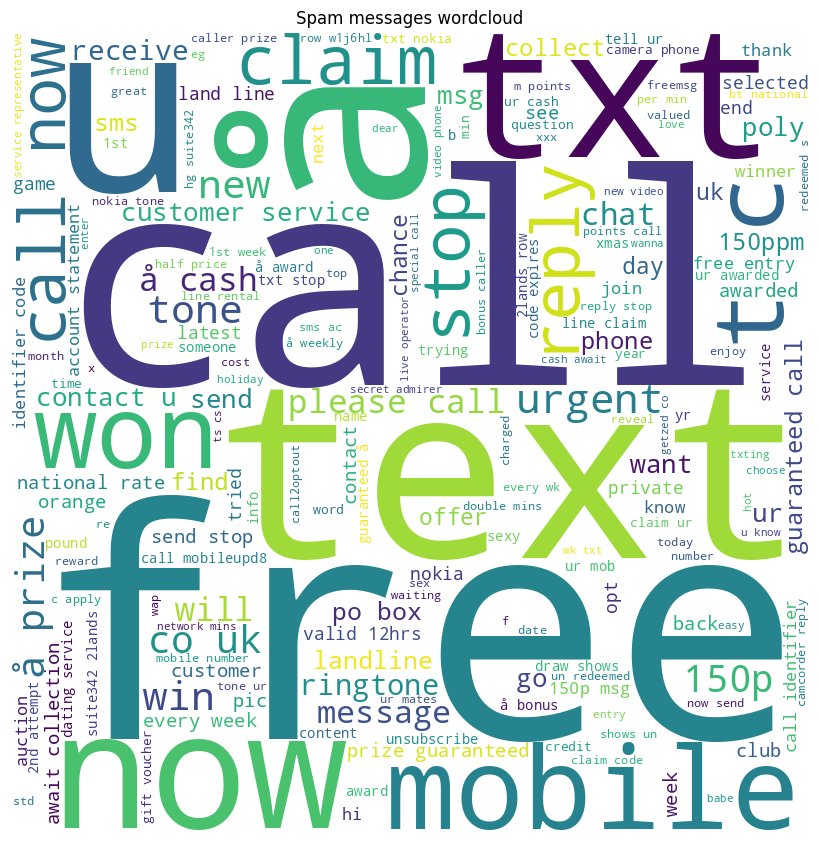

In [ ]:
from wordcloud import WordCloud

# Function to plot wordcloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10).generate(text)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)

# Plotting wordclouds for both 'ham' and 'spam' messages
ham_text = " ".join(message for message in data_clean[data_clean['label']=='ham']['text'])
spam_text = " ".join(message for message in data_clean[data_clean['label']=='spam']['text'])

plot_wordcloud(ham_text, "Ham messages wordcloud")
wordcloud_ham = plt.gcf()

plot_wordcloud(spam_text, "Spam messages wordcloud")
wordcloud_spam = plt.gcf()

wordcloud_ham, wordcloud_spam

The word clouds for 'ham' and 'spam' messages give us a visual representation of the most frequent words in each category:

The 'Ham messages wordcloud' shows a variety of common words used in everyday conversation, without any clear dominant terms.


The 'Spam messages wordcloud', on the other hand, shows prominent words like 'free', 'text', 'call', 'mobile', etc., which are often associated with promotional and unsolicited content.

## Plot distribution

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='length', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Message Length')

Text(0.5, 0, 'Message Length')

Text(0, 0.5, 'Frequency')

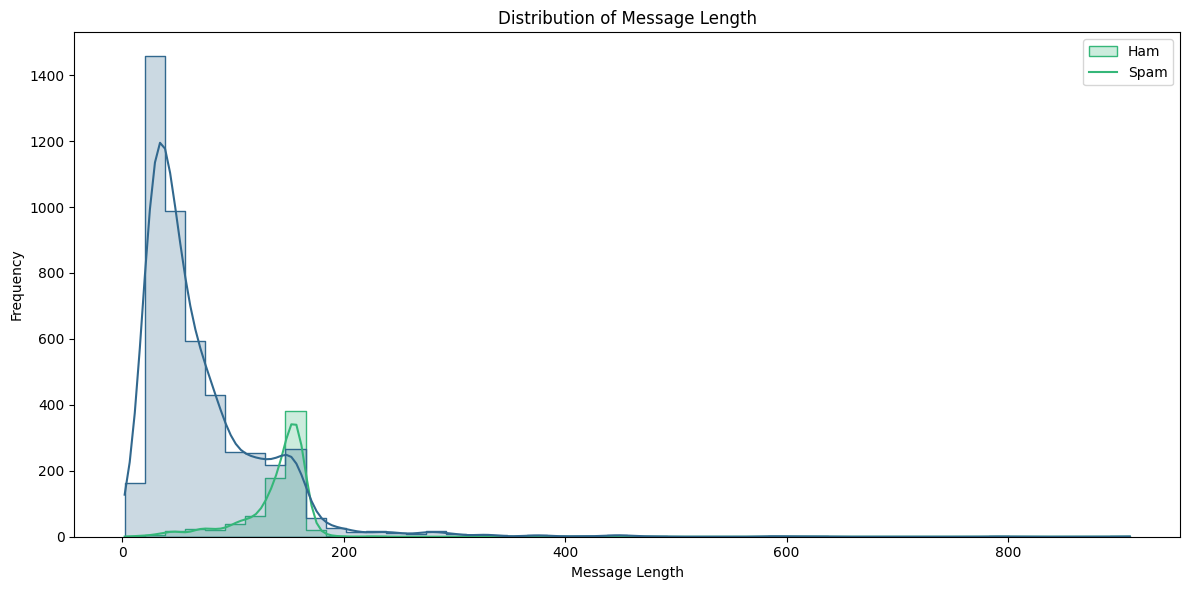

,count,mean,std,min,25%,50%,75%,max
v1,,,,,,,,
ham,4825.0,71.023627,58.016023,2.0,33.0,52.0,92.0,910.0
spam,747.0,138.866131,29.183082,13.0,132.5,149.0,157.0,224.0


In [ ]:
# Calculate message length
df['length'] = df['v2'].apply(len)

# Plot distribution of message length for both spam and ham messages
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='length', hue='v1', bins=50, kde=True, element='step', palette='viridis')
plt.title('Distribution of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(['Ham', 'Spam'])

plt.tight_layout()
plt.show()

# Descriptive statistics of message length for both categories
statistics = df.groupby('v1')['length'].describe()
statistics

The distribution of message lengths between 'ham' and 'spam' messages shows distinct patterns:

Ham (non-spam) messages tend to be shorter, with a mean length of approximately 71 characters. The length varies widely, though, with some messages being very short (minimum of 2 characters) and others much longer (up to 910 characters).


Spam messages are generally longer, with a mean length of about 139 characters. The spread of lengths is narrower for spam messages, ranging from 13 to 224 characters.

## TF-IDF visualisation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Re-initializing the TF-IDF Vectorizer now with 'data_clean'
tfidf_vectorizer_data_clean = TfidfVectorizer(stop_words='english', max_features=1000)

# Transforming the 'message' column of data_clean using TF-IDF
tfidf_matrix_data_clean = tfidf_vectorizer_data_clean.fit_transform(data_clean['text'])

# Creating a DataFrame from the TF-IDF matrix for easier manipulation
df_tfidf_data_clean = pd.DataFrame(tfidf_matrix_data_clean.toarray(), columns=tfidf_vectorizer_data_clean.get_feature_names_out())

# Identifying spam messages in data_clean
spam_indices_data_clean = data_clean[data_clean['label'] == 'spam'].index

# Calculating average TF-IDF scores for words in spam messages
avg_tfidf_scores_data_clean = df_tfidf_data_clean.loc[spam_indices_data_clean].mean().sort_values(ascending=False)

avg_tfidf_scores_data_clean.head(20)

free       0.060179
txt        0.045359
mobile     0.039427
text       0.038554
stop       0.037292
claim      0.036077
ur         0.033210
reply      0.032289
prize      0.032068
www        0.031167
new        0.027198
uk         0.026345
won        0.025745
cash       0.025137
150p       0.025043
service    0.024639
urgent     0.022786
win        0.022625
50         0.021397
nokia      0.021276
dtype: float64

# Machine Learning

In [ ]:
data_clean.head()

,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


## Count Vectorization of text

In [ ]:
# Split the dataset into training and testing sets, set seed = 42
X_train, X_test, y_train, y_test = train_test_split(data_clean['text'], data_clean['label'], test_size=0.2, random_state=42)

#check balance of test set
def check(y_test):
  ham_count = 0
  spam_count = 0
  for label in y_test:
    if label == 'ham':
      ham_count += 1
    else:
      spam_count += 1
  print("Ham count:",ham_count, "Spam count:",spam_count)

check(y_test)

Ham count: 965 Spam count: 150


As the test set is unbalanced with much more 'ham' then 'spam' data, we can only keep the first 150 ham data and add the rest back into the train set, so the test set has equal number of spam and ham data.

In [ ]:
# Separate spam and ham data in the test set
spam_indices = y_test[y_test == 'spam'].index
ham_indices = y_test[y_test == 'ham'].index

# Sample the same number of ham samples as spam samples from the test set
ham_indices_balanced = ham_indices[:150]

# Combine indices of spam and balanced ham samples
balanced_indices = spam_indices.union(ham_indices_balanced)

# Create the new balanced test set
X_test_balanced = X_test.loc[balanced_indices]
y_test_balanced = y_test.loc[balanced_indices]

# Update the test set to only contain the remaining samples
X_test = X_test.drop(index=balanced_indices)
y_test = y_test.drop(index=balanced_indices)

# Add the remaining samples back to the training set
X_train = pd.concat([X_train, X_test])
y_train = pd.concat([y_train, y_test])

# Update X_test and y_test to contain only the balanced samples
X_test = X_test_balanced
y_test = y_test_balanced

#check balance of test set
check(y_test)
print("y_test:")
y_test.head()
print("X_test:")
X_test.head()
X_test.info()

Ham count: 150 Spam count: 150
y_test:


8     spam
12    spam
15    spam
23     ham
33     ham
Name: label, dtype: object

X_test:


8     winner!! as a valued network customer you have...
12    urgent! you have won a 1 week free membership ...
15    xxxmobilemovieclub: to use your credit, click ...
23    aft i finish my lunch then i go str down lor. ...
33    for fear of fainting with the of all that hous...
Name: text, dtype: object

<class 'pandas.core.series.Series'>
Index: 300 entries, 8 to 5567
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
300 non-null    object
dtypes: object(1)
memory usage: 4.7+ KB


In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

print(X_train_count.toarray())

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Naive Bayes Classifier

MultinomialNB()

Accuracy on train set: 0.9944992412746586
Accuracy on test set: 0.94

Classification Report on test set:
              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       150
        spam       0.99      0.89      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



<Axes: >

<Axes: >

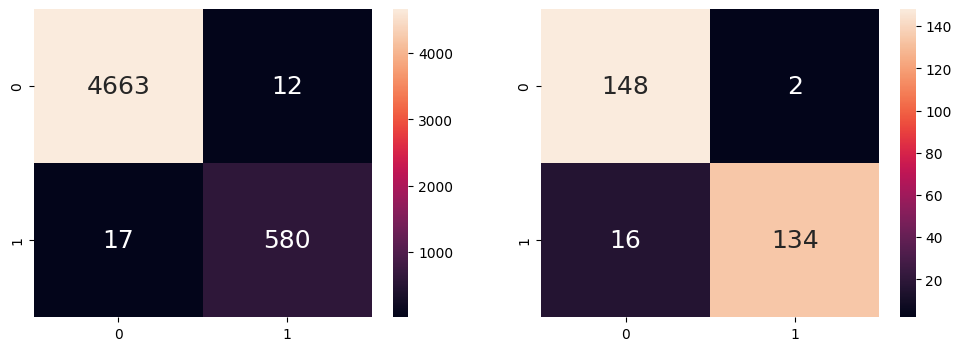

In [ ]:
# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_count, y_train)

# Predict labels for train set
y_train_pred = classifier.predict(X_train_count)

# Predict labels for test set
y_test_pred = classifier.predict(X_test_count)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Logistic Regression

LogisticRegression()

Accuracy on train set: 0.9986722306525038
Accuracy on test set: 0.92

Classification Report on test set:
              precision    recall  f1-score   support

         ham       0.86      1.00      0.93       150
        spam       1.00      0.84      0.91       150

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



<Axes: >

<Axes: >

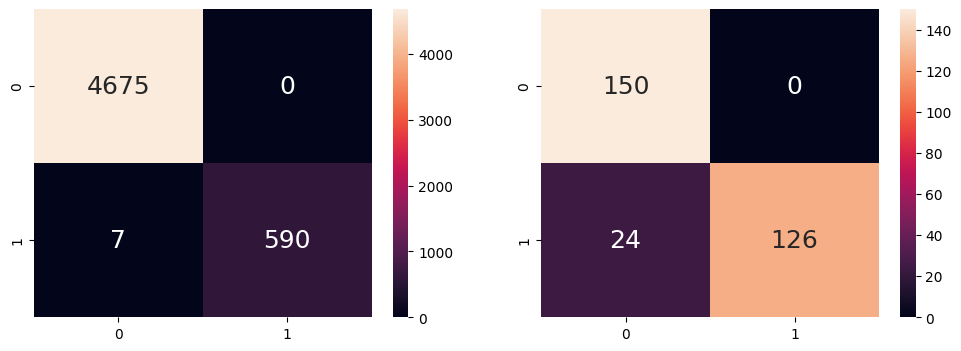

In [ ]:
# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_count, y_train)

# Predict labels for train set
y_train_pred_tfidf = classifier.predict(X_train_count)

# Predict labels for test set
y_test_pred_tfidf = classifier.predict(X_test_count)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred_tfidf)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred_tfidf)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred_tfidf))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Support Vector Machine (SVM) classifier

SVC(kernel='linear')

Accuracy on train set: 1.0
Accuracy on test set: 0.94

Classification Report on test set:
              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       150
        spam       1.00      0.88      0.94       150

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300



<Axes: >

<Axes: >

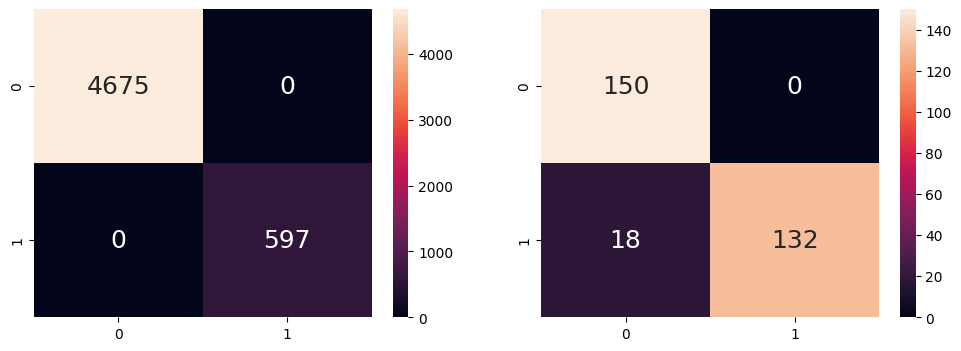

In [ ]:
# Train a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train_count, y_train)

# Predict labels for train set
y_train_pred_tfidf = classifier.predict(X_train_count)

# Predict labels for test set
y_test_pred_tfidf = classifier.predict(X_test_count)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred_tfidf)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred_tfidf)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred_tfidf))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Random Forest Classifier

RandomForestClassifier(random_state=42)

Accuracy on train set: 1.0
Accuracy on test set: 0.9166666666666666

Classification Report on test set:
              precision    recall  f1-score   support

         ham       0.86      1.00      0.92       150
        spam       1.00      0.83      0.91       150

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



<Axes: >

<Axes: >

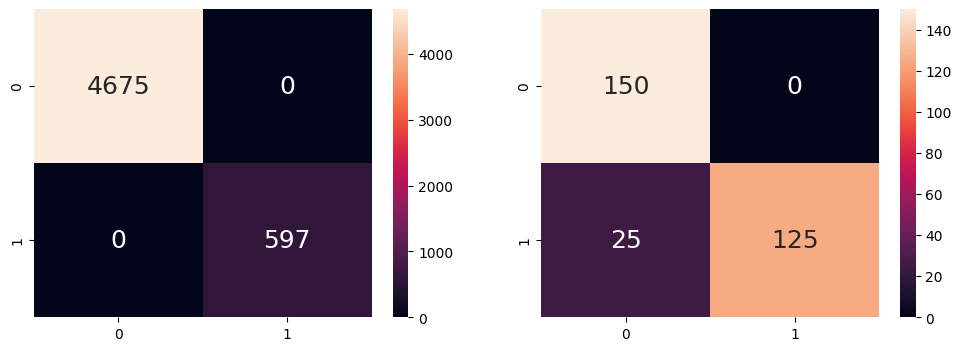

In [ ]:
# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_count, y_train)

# Predict labels for train set
y_train_pred_tfidf = classifier.predict(X_train_count)

# Predict labels for test set
y_test_pred_tfidf = classifier.predict(X_test_count)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred_tfidf)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred_tfidf)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred_tfidf))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


### Neural Networks using Keras (without Dropout layer)

In [ ]:
# Convert labels to categorical format, spam = 0 and ham = 1
y_train_categorical = to_categorical(y_train.map({'spam': 0, 'ham': 1}))
y_test_categorical = to_categorical(y_test.map({'spam': 0, 'ham': 1}))

# Convert CSR matrices to SparseTensor
def csr_to_sparse_tensor(csr_matrix):
    coo = csr_matrix.tocoo()
    indices = np.column_stack((coo.row, coo.col))
    return tf.sparse.SparseTensor(indices, coo.data, coo.shape)

# Convert X_train_count to a SparseTensor as CountVectorizer() returns a CSR matrix that is not compatible with model
X_train_count_sparse = csr_to_sparse_tensor(X_train_count)
X_test_count_sparse = csr_to_sparse_tensor(X_test_count)

# Reorder the sparse tensor
X_train_count_reordered = tf.sparse.reorder(X_train_count_sparse)
X_test_count_reordered = tf.sparse.reorder(X_test_count_sparse)

In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_count.shape[1]))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_count_reordered, y_train_categorical, epochs=10, batch_size=32, verbose=1)

# Evaluate the model for Train set
print("\nTrain set: ")
loss, accuracy = model.evaluate(X_train_count_reordered, y_train_categorical, verbose=0)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

# Evaluate the model for Test set
print("\nTest set: ")
loss, accuracy = model.evaluate(X_test_count_reordered, y_test_categorical, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
165/165 [==============================] - 2s 9ms/step - loss: 0.2913 - accuracy: 0.9435
Epoch 2/10
165/165 [==============================] - 2s 9ms/step - loss: 0.0490 - accuracy: 0.9930
Epoch 3/10
165/165 [==============================] - 2s 10ms/step - loss: 0.0168 - accuracy: 0.9979
Epoch 4/10
165/165 [==============================] - 2s 11ms/step - loss: 0.0078 - accuracy: 0.9992
Epoch 5/10
165/165 [==============================] - 2s 9ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 6/10
165/165 [==============================] - 3s 15ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 7/10
165/165 [==============================] - 3s 18ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 8/10
165/165 [==============================] - 2s 13ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/10
165/165 [==============================] - 2s 12ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/10
165/165 [==============================] - 3s 18ms/step - loss: 8.4417e-04 - accur


Train set: 
Train Loss: 0.0007148910663090646
Train Accuracy: 1.0

Test set: 
Test Loss: 0.376123309135437
Test Accuracy: 0.9266666769981384


### Neural Networks using Keras (with Dropout layer)

In [ ]:
# Define the neural network model
nnmodel1 = Sequential()
nnmodel1.add(Dense(64, activation='relu', input_dim=X_train_count.shape[1]))
nnmodel1.add(Dropout(0.5, seed = 42))
nnmodel1.add(Dense(2, activation='sigmoid'))

# Compile the model
nnmodel1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nnmodel1.fit(X_train_count_reordered, y_train_categorical, epochs=10, batch_size=32, verbose=1)

# Evaluate the model for Train set
print("\nTrain set: ")
loss, accuracy = nnmodel1.evaluate(X_train_count_reordered, y_train_categorical, verbose=0)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

# Evaluate the model for Test set
print("\nTest set: ")
loss, accuracy = nnmodel1.evaluate(X_test_count_reordered, y_test_categorical, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
165/165 [==============================] - 4s 12ms/step - loss: 0.3168 - accuracy: 0.9274
Epoch 2/10
165/165 [==============================] - 1s 9ms/step - loss: 0.0716 - accuracy: 0.9877
Epoch 3/10
165/165 [==============================] - 2s 10ms/step - loss: 0.0335 - accuracy: 0.9937
Epoch 4/10
165/165 [==============================] - 2s 12ms/step - loss: 0.0187 - accuracy: 0.9973
Epoch 5/10
165/165 [==============================] - 2s 9ms/step - loss: 0.0097 - accuracy: 0.9992
Epoch 6/10
165/165 [==============================] - 1s 7ms/step - loss: 0.0061 - accuracy: 0.9992
Epoch 7/10
165/165 [==============================] - 1s 8ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 8/10
165/165 [==============================] - 1s 8ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 9/10
165/165 [==============================] - 1s 8ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 10/10
165/165 [==============================] - 1s 7ms/step - loss: 0.0023 - accuracy: 0.9


Train set: 
Train Loss: 0.000983307370916009
Train Accuracy: 1.0

Test set: 
Test Loss: 0.34099963307380676
Test Accuracy: 0.9366666674613953


## TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique

In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.24509223 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### Naive Bayes Classifier

MultinomialNB()

Accuracy on train set: 0.9734446130500759
Accuracy on test set: 0.85

Classification Report on test set:
              precision    recall  f1-score   support

         ham       0.77      1.00      0.87       150
        spam       1.00      0.70      0.82       150

    accuracy                           0.85       300
   macro avg       0.88      0.85      0.85       300
weighted avg       0.88      0.85      0.85       300



<Axes: >

<Axes: >

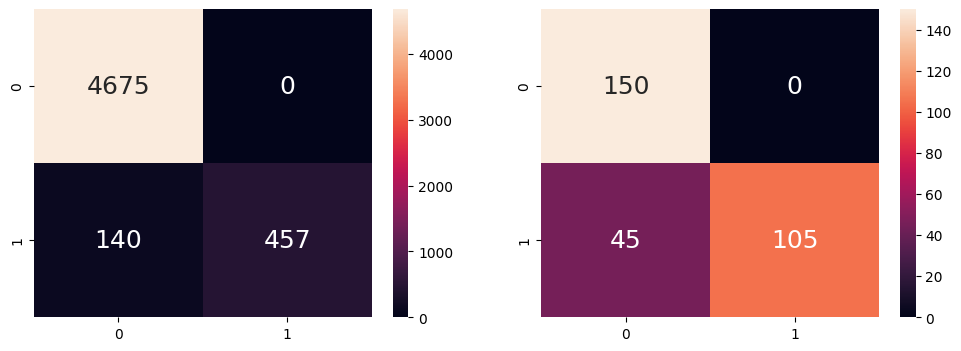

In [ ]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predict labels for train set
y_train_pred_tfidf = classifier.predict(X_train_tfidf)

# Predict labels for test set
y_test_pred_tfidf = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred_tfidf)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred_tfidf)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred_tfidf))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Logistic Regression

LogisticRegression()

Accuracy on train set: 0.9764795144157815
Accuracy on test set: 0.87

Classification Report on test set:
              precision    recall  f1-score   support

         ham       0.79      1.00      0.88       150
        spam       1.00      0.74      0.85       150

    accuracy                           0.87       300
   macro avg       0.90      0.87      0.87       300
weighted avg       0.90      0.87      0.87       300



<Axes: >

<Axes: >

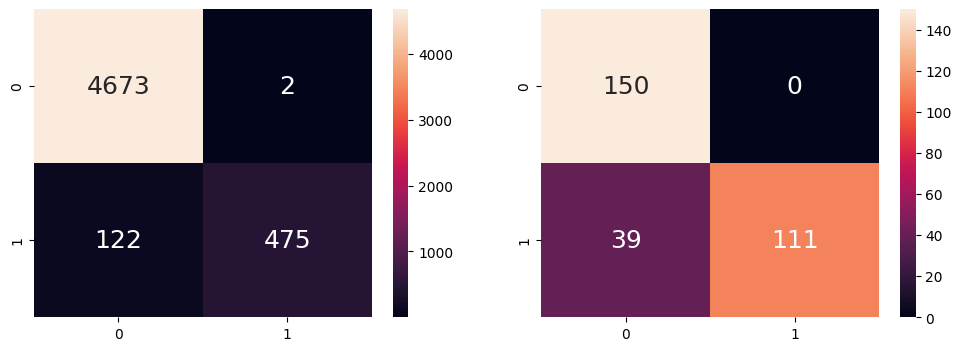

In [ ]:
# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Predict labels for train set
y_train_pred_tfidf = classifier.predict(X_train_tfidf)

# Predict labels for test set
y_test_pred_tfidf = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred_tfidf)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred_tfidf)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred_tfidf))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Support Vector Machine (SVM) classifier

SVC(kernel='linear')

Accuracy on train set: 0.9965857359635811
Accuracy on test set: 0.9366666666666666

Classification Report on test set:
              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       150
        spam       0.99      0.88      0.93       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



<Axes: >

<Axes: >

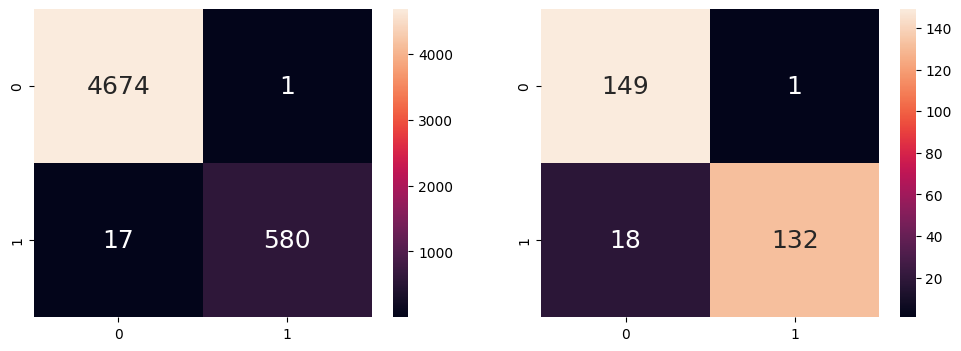

In [ ]:
# Train a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train_tfidf, y_train)

# Predict labels for train set
y_train_pred_tfidf = classifier.predict(X_train_tfidf)

# Predict labels for test set
y_test_pred_tfidf = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred_tfidf)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred_tfidf)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred_tfidf))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Random Forest Classifier

RandomForestClassifier(random_state=42)

Accuracy on train set: 1.0
Accuracy on test set: 0.91

Classification Report on test set:
              precision    recall  f1-score   support

         ham       0.85      1.00      0.92       150
        spam       1.00      0.82      0.90       150

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



<Axes: >

<Axes: >

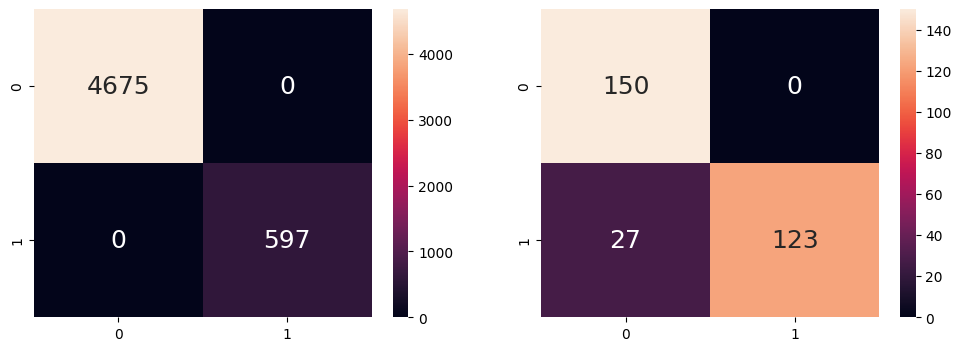

In [ ]:
# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_tfidf, y_train)

# Predict labels for train set
y_train_pred_tfidf = classifier.predict(X_train_tfidf)

# Predict labels for test set
y_test_pred_tfidf = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred_tfidf)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred_tfidf)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred_tfidf))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_tfidf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


### Neural Networks using Keras (without Dropout layer)

In [ ]:
# Convert labels to categorical format, spam = 0 and ham = 1
y_train_categorical = to_categorical(y_train.map({'spam': 0, 'ham': 1}))
y_test_categorical = to_categorical(y_test.map({'spam': 0, 'ham': 1}))

In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_tfidf.shape[1]))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf, y_train_categorical, epochs=10, batch_size=32, verbose=1)

# Evaluate the model for Train set
print("\nTrain set: ")
loss, accuracy = model.evaluate(X_train_tfidf, y_train_categorical, verbose=0)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

# Evaluate the model for Test set
print("\nTest set: ")
loss, accuracy = model.evaluate(X_test_tfidf, y_test_categorical, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
165/165 [==============================] - 2s 8ms/step - loss: 0.3038 - accuracy: 0.9131
Epoch 2/10
165/165 [==============================] - 2s 10ms/step - loss: 0.0561 - accuracy: 0.9879
Epoch 3/10
165/165 [==============================] - 3s 16ms/step - loss: 0.0213 - accuracy: 0.9954
Epoch 4/10
165/165 [==============================] - 2s 11ms/step - loss: 0.0102 - accuracy: 0.9983
Epoch 5/10
165/165 [==============================] - 1s 8ms/step - loss: 0.0056 - accuracy: 0.9996
Epoch 6/10
165/165 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 0.9996
Epoch 7/10
165/165 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 8/10
165/165 [==============================] - 1s 8ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/10
165/165 [==============================] - 2s 9ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/10
165/165 [==============================] - 3s 15ms/step - loss: 9.5389e-04 - accuracy


Train set: 
Train Loss: 0.0007859576726332307
Train Accuracy: 1.0

Test set: 
Test Loss: 0.2467339038848877
Test Accuracy: 0.9366666674613953


### Neural Networks using Keras (with Dropout layer)

In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_tfidf.shape[1]))
model.add(Dropout(0.5,seed = 42))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf, y_train_categorical, epochs=10, batch_size=32, verbose=1)

# Evaluate the model for Train set
print("\nTrain set: ")
loss, accuracy = model.evaluate(X_train_tfidf, y_train_categorical, verbose=0)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

# Evaluate the model for Test set
print("\nTest set: ")
loss, accuracy = model.evaluate(X_test_tfidf, y_test_categorical, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
165/165 [==============================] - 2s 9ms/step - loss: 0.3359 - accuracy: 0.8932
Epoch 2/10
165/165 [==============================] - 1s 8ms/step - loss: 0.0927 - accuracy: 0.9752
Epoch 3/10
165/165 [==============================] - 1s 8ms/step - loss: 0.0400 - accuracy: 0.9913
Epoch 4/10
165/165 [==============================] - 1s 9ms/step - loss: 0.0247 - accuracy: 0.9947
Epoch 5/10
165/165 [==============================] - 2s 12ms/step - loss: 0.0156 - accuracy: 0.9968
Epoch 6/10
165/165 [==============================] - 2s 9ms/step - loss: 0.0105 - accuracy: 0.9981
Epoch 7/10
165/165 [==============================] - 1s 9ms/step - loss: 0.0066 - accuracy: 0.9992
Epoch 8/10
165/165 [==============================] - 1s 8ms/step - loss: 0.0049 - accuracy: 0.9991
Epoch 9/10
165/165 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9996
Epoch 10/10
165/165 [==============================] - 2s 12ms/step - loss: 0.0026 - accuracy: 1.00


Train set: 
Train Loss: 0.0014252258697524667
Train Accuracy: 1.0

Test set: 
Test Loss: 0.24432456493377686
Test Accuracy: 0.9366666674613953


## Combine multiple classifiers with Neural Network

In [ ]:
# Train base classifiers
lr_classifier = LogisticRegression()
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svc_classifier = SVC(probability=True, kernel = 'linear')

lr_classifier.fit(X_train_tfidf, y_train)
nb_classifier.fit(X_train_tfidf, y_train)
rf_classifier.fit(X_train_tfidf, y_train)
svc_classifier.fit(X_train_tfidf, y_train)

lr_classifier_count = LogisticRegression()
nb_classifier_count = MultinomialNB()
rf_classifier_count = RandomForestClassifier(n_estimators=100, random_state=42)
svc_classifier_count = SVC(probability=True, kernel = 'linear')

lr_classifier_count.fit(X_train_count, y_train)
nb_classifier_count.fit(X_train_count, y_train)
rf_classifier_count.fit(X_train_count, y_train)
svc_classifier_count.fit(X_train_count, y_train)

# Define wrapper class
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        # Convert labels to one-hot encoding
        y_categorical = to_categorical(y)
        # Train the Keras model
        self.model.fit(X, y_categorical, epochs=10, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        # Predict probabilities
        y_pred_proba = self.model.predict(X)
        # Convert probabilities to class labels
        y_pred = np.argmax(y_pred_proba, axis=1)
        return y_pred

    def predict_proba(self, X):
        # Predict probabilities
        return self.model.predict(X)

# Wrap trained Keras Sequential model from previous section in a scikit-learn estimator
nn_tfidf = KerasClassifierWrapper(model)

LogisticRegression()

MultinomialNB()

RandomForestClassifier(random_state=42)

SVC(kernel='linear', probability=True)

LogisticRegression()

MultinomialNB()

RandomForestClassifier(random_state=42)

SVC(kernel='linear', probability=True)

### Include all classifiers for both Count Vectoization and TF-IDF data inputs + Neural Network with dropout for TF-IDF data input

In [ ]:
# Combine classifiers for TF-IDF using VotingClassifier
voting_classifier_tfidf = VotingClassifier(
    estimators=[
        ('nb', nb_classifier),
        ('lr', lr_classifier),
        ('rf', rf_classifier),
        ('svc', svc_classifier),
        ('nn', nn_tfidf)  # Adding trained neural network as a base classifier
    ],
    voting='soft'  # Soft voting for probability-based aggregation
)

# Train the voting classifier
voting_classifier_tfidf.fit(X_train_tfidf, y_train)

# Combine classifiers for Count Vectorization using VotingClassifier
voting_classifier_count = VotingClassifier(
    estimators=[
        ('nb', nb_classifier_count),
        ('lr', lr_classifier_count),
        ('rf', rf_classifier_count),
        ('svc', svc_classifier_count)
    ],
    voting='soft'  # Soft voting for probability-based aggregation
)

# Train the voting classifier
voting_classifier_count.fit(X_train_count, y_train)



VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(kernel='linear', probability=True)),
                             ('nn',
                              KerasClassifierWrapper(model=<keras.src.engine.sequential.Sequential object at 0x78704835a0b0>))],
                 voting='soft')

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [ ]:
print("TF-IDF:")
# Evaluate the voting classifier for TF-IDF for train set
y_train_pred = voting_classifier_tfidf.predict(X_train_tfidf)
accuracy = accuracy_score(y_train, y_train_pred)
print("Voting Classifier Accuracy for train set:", accuracy)

# Evaluate the voting classifier for TF-IDF for test set
accuracy = voting_classifier_tfidf.score(X_test_tfidf, y_test)
print("Voting Classifier Accuracy for test set:", accuracy)

print("Count Vectorization:")
# Evaluate the voting classifier for Count Vectorizaion for train set
y_train_pred = voting_classifier_count.predict(X_train_count)
accuracy = accuracy_score(y_train, y_train_pred)
print("Voting Classifier Accuracy for train set:", accuracy)

# Evaluate the voting classifier for Count Vectorizaion for test set
accuracy = voting_classifier_count.score(X_test_count, y_test)
print("Voting Classifier Accuracy for test set:", accuracy)

TF-IDF:
165/165 [==============================] - 0s 2ms/step
Voting Classifier Accuracy for train set: 0.9963960546282246
10/10 [==============================] - 0s 2ms/step
Voting Classifier Accuracy for test set: 0.9266666666666666
Count Vectorization:
Voting Classifier Accuracy for train set: 1.0
Voting Classifier Accuracy for test set: 0.9366666666666666


In [ ]:
# Create pipelines for TF-IDF vectorization and count vectorization of X_train raw text data before inputing them into their respective Voting Classifiers
pipeline_tfidf = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('voting_classifier', voting_classifier_tfidf)
])

pipeline_count = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('voting_classifier', voting_classifier_count)
])

# Combine pipelines using a VotingClassifier, model takes in X_train raw text data, vectorizes it using Count Vectorization and TF-IDF before inputting into their respective pre-trained models
voting_classifier_combined = VotingClassifier(
    estimators=[
        ('tfidf', pipeline_tfidf),
        ('count', pipeline_count)
    ],
    voting='soft'  # Soft voting for probability-based aggregation
)

# Train the combined voting classifier
voting_classifier_combined.fit(X_train, y_train)

print("Combined:")
# Evaluate the voting classifier for train set
y_train_pred = voting_classifier_combined.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Voting Classifier Accuracy for train set:", accuracy)

# Evaluate the voting classifier for test set
accuracy = voting_classifier_combined.score(X_test, y_test)
print("Voting Classifier Accuracy for test set:", accuracy)

VotingClassifier(estimators=[('tfidf',
                              Pipeline(steps=[('tfidf_vectorizer',
                                               TfidfVectorizer()),
                                              ('voting_classifier',
                                               VotingClassifier(estimators=[('nb',
                                                                             MultinomialNB()),
                                                                            ('lr',
                                                                             LogisticRegression()),
                                                                            ('rf',
                                                                             RandomForestClassifier(random_state=42)),
                                                                            ('svc',
                                                                             SVC(kernel='linear',
                                                                                 probability=True)),
                                                                            ('nn',
                                                                             KerasClassifierWrapper(model=<keras.src.engine.sequential.Sequential object at 0x78704835a0b0>))],
                                                                voting='soft'))])),
                             ('count',
                              Pipeline(steps=[('count_vectorizer',
                                               CountVectorizer()),
                                              ('voting_classifier',
                                               VotingClassifier(estimators=[('nb',
                                                                             MultinomialNB()),
                                                                            ('lr',
                                                                             LogisticRegression()),
                                                                            ('rf',
                                                                             RandomForestClassifier(random_state=42)),
                                                                            ('svc',
                                                                             SVC(kernel='linear',
                                                                                 probability=True))],
                                                                voting='soft'))]))],
                 voting='soft')

Combined:
165/165 [==============================] - 0s 1ms/step
Voting Classifier Accuracy for train set: 0.9977238239757208
10/10 [==============================] - 0s 2ms/step
Voting Classifier Accuracy for test set: 0.93


### Drop Naive Bayes and Logistic regression for TF-IDF due to lower accuracies

In [ ]:
# Combine classifiers using VotingClassifier
voting_classifier_tfidf = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('svc', svc_classifier),
        ('nn', nn_tfidf)  # Adding trained neural network as a base classifier
    ],
    voting='soft'  # Soft voting for probability-based aggregation
)

# Train the voting classifier
voting_classifier_tfidf.fit(X_train_tfidf, y_train)

# Create pipelines for TF-IDF vectorization and count vectorization
pipeline_tfidf = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('voting_classifier', voting_classifier_tfidf)
])

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(kernel='linear', probability=True)),
                             ('nn',
                              KerasClassifierWrapper(model=<keras.src.engine.sequential.Sequential object at 0x78704835a0b0>))],
                 voting='soft')

#### Soft Voting

In [ ]:
# Combine pipelines using a VotingClassifier
voting_classifier_combined = VotingClassifier(
    estimators=[
        ('tfidf', pipeline_tfidf),
        ('count', pipeline_count)
    ],
    voting='soft'  # Soft voting for probability-based aggregation
)

# Train the combined voting classifier
voting_classifier_combined.fit(X_train, y_train)

print("Combined:")
# Evaluate the voting classifier for train set
y_train_pred = voting_classifier_combined.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Voting Classifier Accuracy for train set:", accuracy)

# Evaluate the voting classifier for test set
accuracy = voting_classifier_combined.score(X_test, y_test)
print("Voting Classifier Accuracy for test set:", accuracy)

VotingClassifier(estimators=[('tfidf',
                              Pipeline(steps=[('tfidf_vectorizer',
                                               TfidfVectorizer()),
                                              ('voting_classifier',
                                               VotingClassifier(estimators=[('rf',
                                                                             RandomForestClassifier(random_state=42)),
                                                                            ('svc',
                                                                             SVC(kernel='linear',
                                                                                 probability=True)),
                                                                            ('nn',
                                                                             KerasClassifierWrapper(model=<keras.src.engine.sequential.Sequential object at 0x78704835a0b0>))],
                                                                voting='soft'))])),
                             ('count',
                              Pipeline(steps=[('count_vectorizer',
                                               CountVectorizer()),
                                              ('voting_classifier',
                                               VotingClassifier(estimators=[('nb',
                                                                             MultinomialNB()),
                                                                            ('lr',
                                                                             LogisticRegression()),
                                                                            ('rf',
                                                                             RandomForestClassifier(random_state=42)),
                                                                            ('svc',
                                                                             SVC(kernel='linear',
                                                                                 probability=True))],
                                                                voting='soft'))]))],
                 voting='soft')

Combined:
165/165 [==============================] - 0s 1ms/step
Voting Classifier Accuracy for train set: 0.999051593323217
10/10 [==============================] - 0s 2ms/step
Voting Classifier Accuracy for test set: 0.9433333333333334


#### Hard Voting

In [ ]:
# Combine pipelines using a VotingClassifier
voting_classifier_combined = VotingClassifier(
    estimators=[
        ('tfidf', pipeline_tfidf),
        ('count', pipeline_count)
    ],
    voting='hard'  # Hard voting for probability-based aggregation
)

# Train the combined voting classifier
voting_classifier_combined.fit(X_train, y_train)

print("Combined:")
# Evaluate the voting classifier for train set
y_train_pred = voting_classifier_combined.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Voting Classifier Accuracy for train set:", accuracy)

# Evaluate the voting classifier for test set
accuracy = voting_classifier_combined.score(X_test, y_test)
print("Voting Classifier Accuracy for test set:", accuracy)

VotingClassifier(estimators=[('tfidf',
                              Pipeline(steps=[('tfidf_vectorizer',
                                               TfidfVectorizer()),
                                              ('voting_classifier',
                                               VotingClassifier(estimators=[('rf',
                                                                             RandomForestClassifier(random_state=42)),
                                                                            ('svc',
                                                                             SVC(kernel='linear',
                                                                                 probability=True)),
                                                                            ('nn',
                                                                             KerasClassifierWrapper(model=<keras.src.engine.sequential.Sequential object at 0x78704835a0b0>))],
                                                                voting='soft'))])),
                             ('count',
                              Pipeline(steps=[('count_vectorizer',
                                               CountVectorizer()),
                                              ('voting_classifier',
                                               VotingClassifier(estimators=[('nb',
                                                                             MultinomialNB()),
                                                                            ('lr',
                                                                             LogisticRegression()),
                                                                            ('rf',
                                                                             RandomForestClassifier(random_state=42)),
                                                                            ('svc',
                                                                             SVC(kernel='linear',
                                                                                 probability=True))],
                                                                voting='soft'))]))])

Combined:
165/165 [==============================] - 0s 2ms/step
Voting Classifier Accuracy for train set: 0.9981031866464339
10/10 [==============================] - 0s 2ms/step
Voting Classifier Accuracy for test set: 0.9266666666666666
